In [1]:
from create_data_single import Dumb as d
from dklsuq import DeepKernelSUQ as dklu
import matplotlib
import matplotlib.pyplot as plt

In [2]:
data_instance = d(0.5, 0.5, 0.25, 26)
fc, pc, l, tc, lt = data_instance.create_dataset(50, 2, [50], [0.2], True)

In [3]:
import torch
torch.manual_seed(26)
fc, pc, tc = torch.tensor(fc), torch.tensor(pc), torch.tensor(tc)

In [4]:
model = dklu(point_cloud=fc, partial_cloud=pc, test_partial=tc)

In [5]:
use_cuda = torch.cuda.is_available()
#device = torch.device("cuda" if use_cuda else "cpu")
device = "cpu"
model.set_device(device)

In [6]:
model.set_test_data(tc)

In [7]:
model.train_with_mapping(num_epochs=20, batch_size=20, learning_rate=0.0001)

C:\Users\Acer\Documents\All_of_RWTH\ThesisTarget\1MYWORK\thesis_notebooks\dklsuq.py:184: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:3679.)
  + posterior_mean.T @ torch.linalg.inv(posterior_var) @ posterior_mean)


Epoch:0, Loss: 1.2099542294939358
Epoch:1, Loss: 0.3767518355614609
Epoch:2, Loss: -0.6446262178597627
Epoch:3, Loss: -23.796753436005044
Epoch:4, Loss: -7.769682327178097
Epoch:5, Loss: -5.094304216989866
Epoch:6, Loss: -1.6897903202603233
Epoch:7, Loss: -21.506270114535425
Epoch:8, Loss: -8.536634432840458
Epoch:9, Loss: -0.5528699515819918
Epoch:10, Loss: -5.006294133218142
Epoch:11, Loss: -2.9844799693928863
Epoch:12, Loss: -0.9839985972976256
Epoch:13, Loss: -2.1991606394064283
Epoch:14, Loss: 0.059239768663649585
Epoch:15, Loss: 0.620245768768789
Epoch:16, Loss: 0.08178661983648983
Epoch:17, Loss: 0.009183309463792533
Epoch:18, Loss: -3.299831703474742
Epoch:19, Loss: 0.6548754435709377


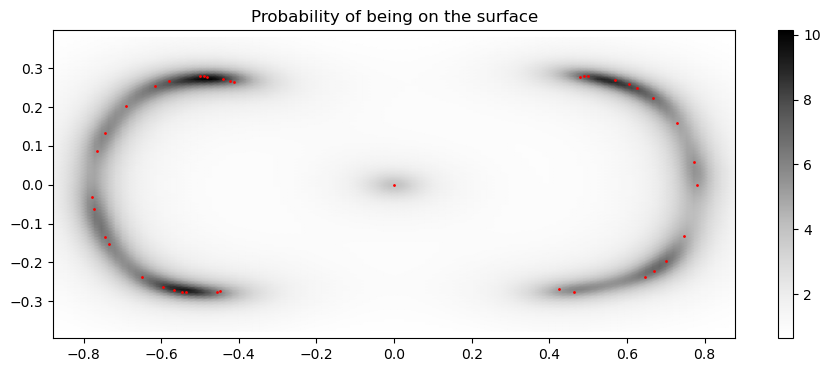

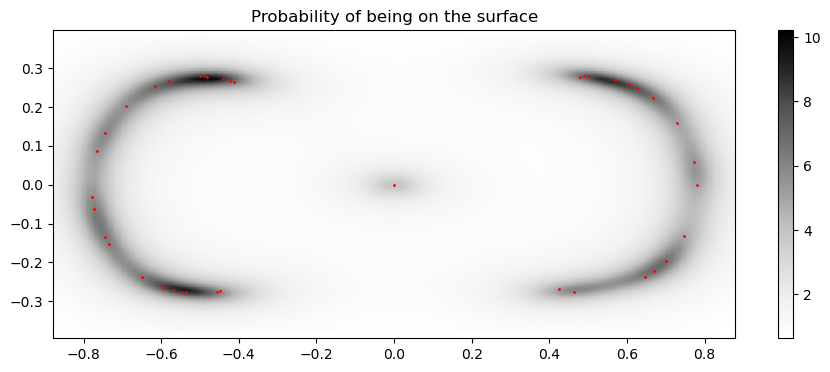

In [8]:
model.predict(do_mapping=True)

In [9]:
model.set_test_data(pc[2:4, :])

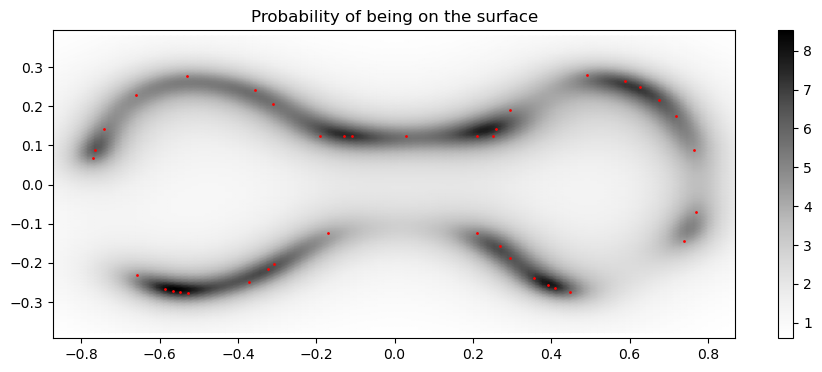

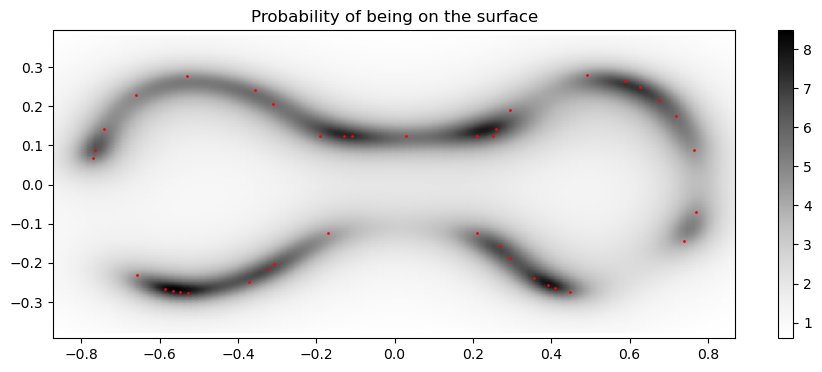

In [10]:
model.predict(do_mapping=True)

In [11]:
model_enc = dklu(point_cloud=fc, partial_cloud=pc, test_partial=tc)

In [12]:
model_enc.train_with_mapping_encoding(num_epochs=20, batch_size=20, learning_rate=0.0001)

Epoch:0, Loss: 50.031242111076914
Epoch:1, Loss: 16.82976735641973
Epoch:2, Loss: 6.020122577367282
Epoch:3, Loss: 2.0269500355316716
Epoch:4, Loss: -4.434058582935283
Epoch:5, Loss: 2249.4560077548763
Epoch:6, Loss: 749.8483667635915
Epoch:7, Loss: 250.66423299013317
Epoch:8, Loss: 83.8934120220401
Epoch:9, Loss: 28.430452037021784
Epoch:10, Loss: 1.3447082996915671
Epoch:11, Loss: 0.16546246113217186
Epoch:12, Loss: 2.3971480152320077
Epoch:13, Loss: 1.003424125497911
Epoch:14, Loss: -19.15633532195112
Epoch:15, Loss: -4.791424777280359
Epoch:16, Loss: 1.9941846933477227
Epoch:17, Loss: -0.40846081884327506
Epoch:18, Loss: -0.125723363414814
Epoch:19, Loss: 8.844156423722568


In [13]:
model_enc.set_test_data(tc)

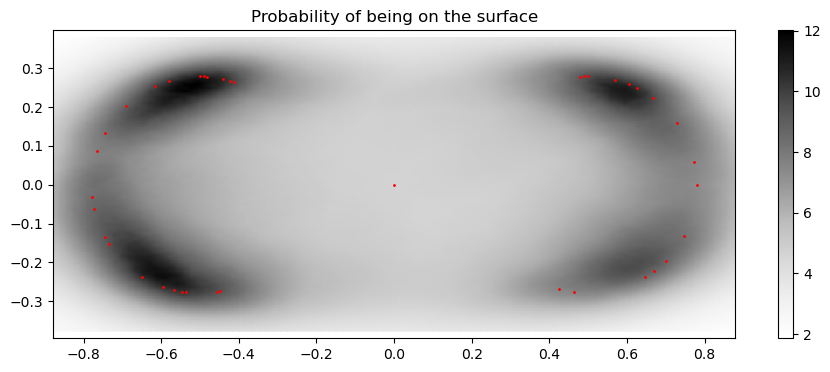

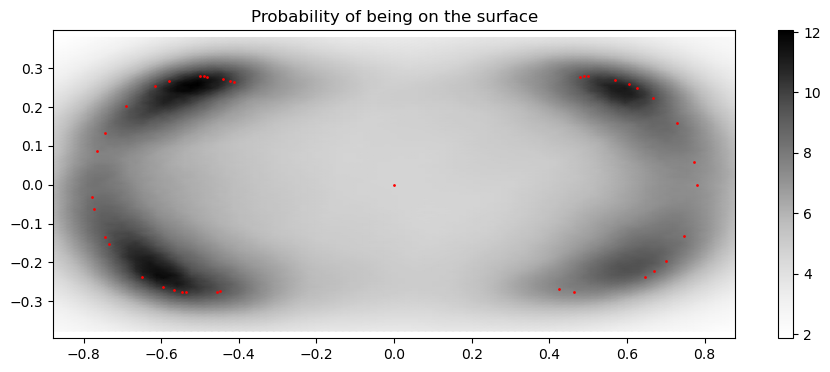

In [14]:
model_enc.predict(do_mapping=True, encoding_only=True)

In [15]:
model_enc.set_test_data(pc[2:4, :])

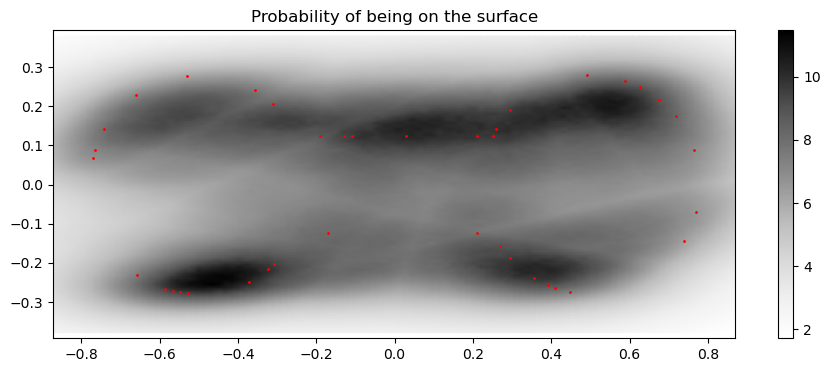

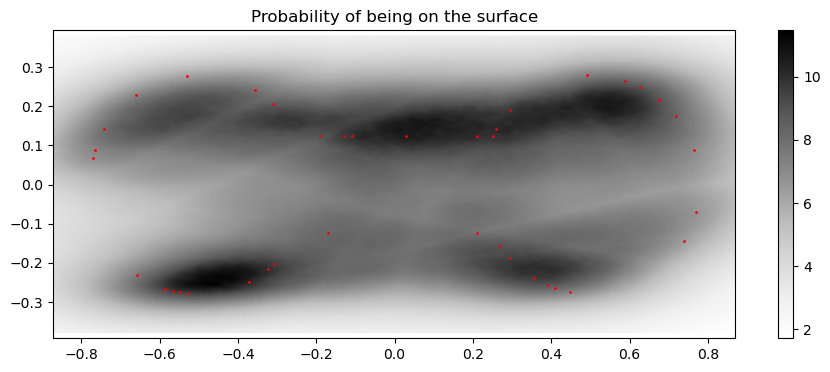

In [16]:
model_enc.predict(do_mapping=True, encoding_only=True)